In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("/kaggle/input/data-science-salary/ds_salaries.xlsx")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## Understanding the Data

In [4]:
df.shape

(607, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [6]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [7]:
# Lets drop salary columns and use "salary_in_usd" to ensure consistency across different countries and currencies
df.drop(columns=['salary'],inplace=True)

<Axes: >

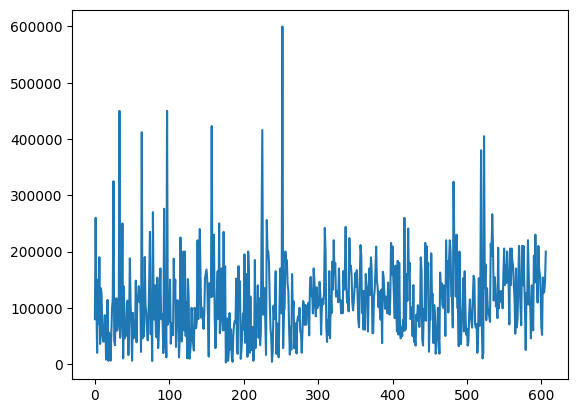

In [8]:
df['salary_in_usd'].plot()

## Business Problems (Solved using Pandas)

In [9]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L


### Q1. Salary Analysis by Job Title

In [10]:
df.groupby(['job_title']).agg(
    avg_salary = ('salary_in_usd','mean')
).reset_index().assign(
    avg_salary=lambda x: x['avg_salary'].apply(lambda v: f"${v:.2f}")
)

,job_title,avg_salary
0,3D Computer Vision Researcher,$5409.00
1,AI Scientist,$66135.57
2,Analytics Engineer,$175000.00
3,Applied Data Scientist,$175655.00
4,Applied Machine Learning Scientist,$142068.75
5,BI Data Analyst,$74755.17
6,Big Data Architect,$99703.00
7,Big Data Engineer,$51974.00
8,Business Data Analyst,$76691.20
9,Cloud Data Engineer,$124647.00


### Q2. Top Paying Companies (based on Location)

In [11]:
result = (
    df.groupby('company_location')['salary_in_usd']
    .mean()
    .nlargest(5)
    .reset_index()
    .rename(columns={'company_location': 'Location', 'salary_in_usd': 'avg_salary'})
)

# Round avg_salary to 2 decimal places
result['avg_salary'] = result['avg_salary'].round(2)
result

,Location,avg_salary
0,RU,157500.00
1,US,144055.26
2,NZ,125000.00
3,IL,119059.00
4,JP,114127.33


### Q3.Remote Work vs Salary

In [12]:
df.groupby(['remote_ratio']).agg(
    avg_salary_usd = ('salary_in_usd','mean')
).reset_index()

,remote_ratio,avg_salary_usd
0,0,106354.622047
1,50,80823.030303
2,100,122457.454068


### Q4. Experience Level Impact on Salaries

In [13]:
df.groupby(['experience_level']).agg(
    avg_salary_usd = ('salary_in_usd','mean')
).reset_index()

,experience_level,avg_salary_usd
0,EN,61643.318182
1,EX,199392.038462
2,MI,87996.056338
3,SE,138617.292857


<Axes: >

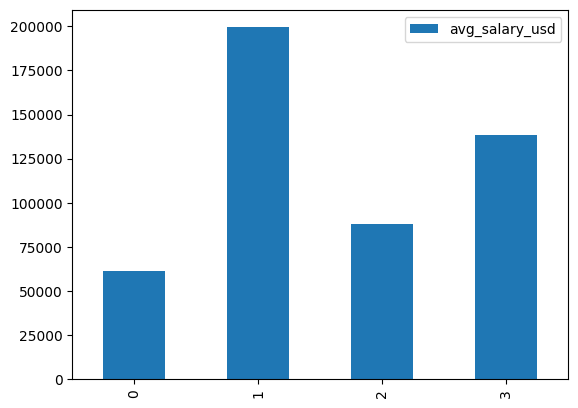

In [14]:
df.groupby(['experience_level']).agg(
    avg_salary_usd = ('salary_in_usd','mean')
).reset_index().plot(kind='bar')

### Q5. Company Size Salary Comparison

In [15]:
df.groupby(['company_size']).agg(
    avg_salary_usd = ('salary_in_usd','mean')
).reset_index()

,company_size,avg_salary_usd
0,L,119242.994949
1,M,116905.466258
2,S,77632.674699


<Axes: >

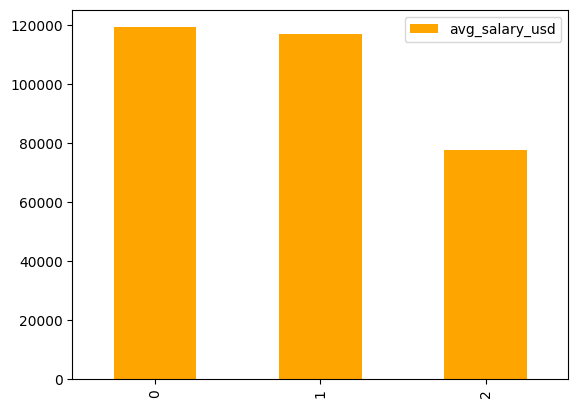

In [16]:
df.groupby(['company_size']).agg(
    avg_salary_usd = ('salary_in_usd','mean')
).reset_index().plot(kind='bar',color='orange')

### Q6. Growth in Salaries Over Years

In [17]:
df.groupby(['work_year']).agg(
    avg_salary_usd = ('salary_in_usd','mean')
).reset_index()

,work_year,avg_salary_usd
0,2020,95813.000000
1,2021,99853.792627
2,2022,124522.006289


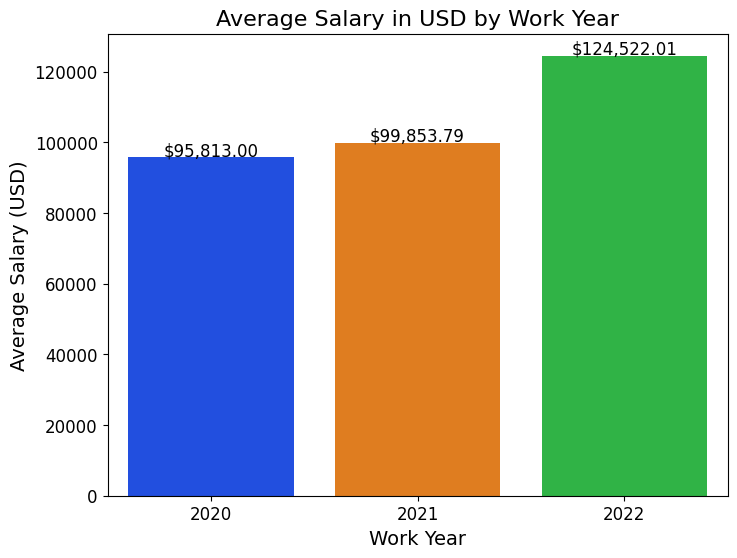

In [18]:
data = df.groupby(['work_year']).agg(
    avg_salary_usd=('salary_in_usd', 'mean')
).reset_index()

# Plot the data
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='work_year', y='avg_salary_usd', palette='bright')

# Add bar values
for i, v in enumerate(data['avg_salary_usd']):
    plt.text(i, v + 500, f"${v:,.2f}", ha='center', fontsize=12)

# Customize the chart
plt.title('Average Salary in USD by Work Year', fontsize=16)
plt.xlabel('Work Year', fontsize=14)
plt.ylabel('Average Salary (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### Q7. Remote Ratio by Company Size

In [19]:
df.groupby(['company_size']).agg(
    remote_ratio = ('remote_ratio','mean')
).reset_index()

,company_size,remote_ratio
0,L,68.686869
1,M,72.546012
2,S,69.879518


### Q8. Outlier Detection

In [20]:
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['salary_in_usd'] < Q1 - 1.5 * IQR) | 
                        (df['salary_in_usd'] > Q3 + 1.5 * IQR)]

outliers

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
25,2020,EX,FT,Director of Data Science,USD,325000,US,100,US,L
33,2020,MI,FT,Research Scientist,USD,450000,US,0,US,M
63,2020,SE,FT,Data Scientist,USD,412000,US,100,US,L
97,2021,MI,FT,Financial Data Analyst,USD,450000,US,100,US,L
157,2021,MI,FT,Applied Machine Learning Scientist,USD,423000,US,50,US,L
225,2021,EX,CT,Principal Data Scientist,USD,416000,US,100,US,S
252,2021,EX,FT,Principal Data Engineer,USD,600000,US,100,US,L
482,2022,EX,FT,Data Engineer,USD,324000,US,100,US,M
519,2022,SE,FT,Applied Data Scientist,USD,380000,US,100,US,L
523,2022,SE,FT,Data Analytics Lead,USD,405000,US,100,US,L


### Q9. Top 5 Highest Paid Job Titles

In [21]:
result = (
    df.groupby('job_title')['salary_in_usd']
    .mean()
    .nlargest(5)
    .reset_index()
    .rename(columns={'job_title': 'Job Title', 'salary_in_usd': 'Average Salary (USD)'})
)

# Round avg_salary to 2 decimal places
result['Average Salary (USD)'] = result['Average Salary (USD)'].round(2)
result

,Job Title,Average Salary (USD)
0,Data Analytics Lead,405000.00
1,Principal Data Engineer,328333.33
2,Financial Data Analyst,275000.00
3,Principal Data Scientist,215242.43
4,Director of Data Science,195074.00


### Q10. Salary Comparison Between Remote and On-site Employees


In [22]:
remote_salary = df[df['remote_ratio'] > 0]['salary_in_usd'].mean()
onsite_salary = df[df['remote_ratio'] == 0]['salary_in_usd'].mean()
print(f"Remote Salary: {remote_salary}\nOn-site Salary: {onsite_salary}")

Remote Salary: 113870.35416666667
On-site Salary: 106354.62204724409


## Prepare Data for ML/DL Models

In [23]:
df1 = df.copy()
df1.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L


In [24]:
df1.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

### Encoding Categorical Variables

In [25]:
# Dropping currencies col.
df1.drop(columns=['salary_currency'],inplace=True)
df1.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [26]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-hot encoding for employment_type, experience_level, company_size
df1 = pd.get_dummies(df1, columns=['employment_type', 'experience_level', 'company_size'])

# Label encoding for job_title, employee_residence, company_location
le_job_title = LabelEncoder()
df1['job_title'] = le_job_title.fit_transform(df1['job_title'])

le_employee_residence = LabelEncoder()
df1['employee_residence'] = le_employee_residence.fit_transform(df1['employee_residence'])

le_company_location = LabelEncoder()
df1['company_location'] = le_company_location.fit_transform(df1['company_location'])

df1.head()

,work_year,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,company_size_L,company_size_M,company_size_S
0,2020,22,79833,14,0,12,False,False,True,False,False,False,True,False,True,False,False
1,2020,41,260000,32,0,29,False,False,True,False,False,False,False,True,False,False,True
2,2020,7,109024,20,50,18,False,False,True,False,False,False,False,True,False,True,False
3,2020,47,20000,23,0,20,False,False,True,False,False,False,True,False,False,False,True
4,2020,38,150000,55,50,48,False,False,True,False,False,False,False,True,True,False,False


## Salary Prediction (Regression Model)

In [27]:
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import  log_loss

from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [28]:
# Calculate the IQR (Interquartile Range)
Q1 = df1['salary_in_usd'].quantile(0.25)
Q3 = df1['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
df1 = df1[(df1['salary_in_usd'] >= Q1 - 1.5 * IQR) & 
                (df1['salary_in_usd'] <= Q3 + 1.5 * IQR)]

print("Dataframe shape with Outliers: ",df.shape)
print("Dataframe shape without Outliers",df1.shape) # 10 values removed

Dataframe shape with Outliers:  (607, 10)
Dataframe shape without Outliers (597, 17)


### Creating New Feature (to improve Model's Performance)
* `residence_salary_ratio`: The ratio of employee residence and salary (Improved the model's performance from a r2 score of 40-50 to 90+ 

In [29]:
df1['residence_salary_ratio'] = df1['salary_in_usd'] / (df1['employee_residence'] + 1)

In [30]:
X = df1.drop(columns=['salary_in_usd'])
y = df1['salary_in_usd']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.head(3)

,work_year,job_title,employee_residence,remote_ratio,company_location,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,company_size_L,company_size_M,company_size_S,residence_salary_ratio
9,2020,33,41,50,38,False,False,True,False,False,False,False,True,False,False,True,2976.190476
556,2022,17,55,100,48,False,False,True,False,False,False,False,True,False,True,False,2589.285714
160,2021,29,49,50,43,False,False,True,False,False,True,False,False,True,False,False,4600.000000


In [32]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

X_train_s

array([[-2.03678007,  1.09468293,  0.01321597, ..., -1.08539495,
         2.49545041, -0.10973559],
       [ 0.82913171, -0.41773925,  0.78739353, ...,  0.92132362,
        -0.40072926, -0.16469697],
       [-0.60382418,  0.71657738,  0.45560315, ..., -1.08539495,
        -0.40072926,  0.12093313],
       ...,
       [-0.60382418, -1.93016142, -1.25864717, ..., -1.08539495,
        -0.40072926, -0.1213064 ],
       [ 0.82913171, -0.41773925, -1.14805037, ...,  0.92132362,
        -0.40072926,  0.13147219],
       [-0.60382418,  2.51257872, -1.81163114, ..., -1.08539495,
        -0.40072926,  2.42602843]])

In [33]:
lr = LinearRegression()
lr.fit(X_train_s,y_train)

y_pred = lr.predict(X_test_s)

r2 = r2_score(y_test,y_pred)
r2

0.4673053215123597

In [34]:
xgb_model = XGBRegressor()

xgb_model.fit(X_train_s,y_train)

y_pred_xg = xgb_model.predict(X_test_s)

print("R2 Score => ",r2_score(y_test,y_pred_xg))

R2 Score =>  0.9742454622569536


In [35]:
lgbm_model = LGBMRegressor(verbose=-1)

lgbm_model.fit(X_train_s,y_train)

y_pred_lg = lgbm_model.predict(X_test_s)

print("R2 Score => ",r2_score(y_test,y_pred_lg))

R2 Score =>  0.945251904406906


In [36]:
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor()
GB.fit(X_train_s,y_train)

y_pred_gb = GB.predict(X_test_s)

r2_score(y_test,y_pred_gb)

0.972455509458427

In [37]:
from sklearn.ensemble import StackingRegressor

# Create base models
base_models = [
    ("xgb", xgb_model),
    ('gb',GB)
]

# Create the stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Fit the stacking regressor to the entire training set
stacking_regressor.fit(X_train_s, y_train)

# Make predictions on new data
y_pred_stacked = stacking_regressor.predict(X_test_s)
r2_score(y_test,y_pred_stacked)

0.9733440067670288

## Unified Pipeline
* Implement all preprocessing, model training, and prediction steps in a single pipeline for efficient and consistent handling of data transformations and predictions. This ensures seamless model evaluation, prediction and deployment.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import pandas as pd

# Prepare Data for ML/DL Models
df1 = df.copy()
df1.drop(columns=['salary_currency'], inplace=True)

# One-hot encoding for employment_type, experience_level, company_size
df1 = pd.get_dummies(df1, columns=['employment_type', 'experience_level', 'company_size'])

# Label encoding for job_title, employee_residence, company_location
le_job_title = LabelEncoder()
df1['job_title'] = le_job_title.fit_transform(df1['job_title'])

le_employee_residence = LabelEncoder()
df1['employee_residence'] = le_employee_residence.fit_transform(df1['employee_residence'])

le_company_location = LabelEncoder()
df1['company_location'] = le_company_location.fit_transform(df1['company_location'])

# Calculate the IQR (Interquartile Range)
Q1 = df1['salary_in_usd'].quantile(0.25)
Q3 = df1['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
df1 = df1[(df1['salary_in_usd'] >= Q1 - 1.5 * IQR) & 
                (df1['salary_in_usd'] <= Q3 + 1.5 * IQR)]

# Feature engineering: Add 'residence_salary_ratio'
df1['residence_salary_ratio'] = df1['salary_in_usd'] / (df1['employee_residence'] + 1)

# Define features (X) and target (y)
X = df1.drop(columns=['salary_in_usd'])
y = df1['salary_in_usd']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()

# Create base models for stacking
xgb_model = XGBRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
lg_model = LGBMRegressor(random_state=42,verbose=-1)

# Create the stacking regressor
stacking_regressor = StackingRegressor(
    estimators=[('xgb', xgb_model), ('gb', gb_model),('lgbm',lg_model)], 
    final_estimator=LinearRegression()
)

# Define the full pipeline
pipeline = Pipeline([
    ('scaler', scaler),  # Scaling step
    ('stacking_regressor', stacking_regressor)  # Stacking regressor model
])

# Fit the model using the entire training set
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model using R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.9751117984183484
